In [6]:
import os
os.listdir()


['.ipynb_checkpoints',
 'netflix_analysis.ipynb',
 'images',
 'netflix_titles.csv',
 'requirements.txt',
 'netflix_cleaned.csv',
 'README.md']

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Display the first 5 rows to confirm
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
# Check dataset structure
df.info()

# Check missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
df.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'Unknown'}, inplace=True)


In [16]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [18]:
df['year_added'] = df['date_added'].dt.year
df['year_added'].unique()  # Check unique years


array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2009., 2008.,   nan, 2010.])

In [20]:
df['rating'].fillna("Unknown", inplace=True)


In [22]:
df['duration'].fillna("Unknown", inplace=True)


In [24]:
df.isnull().sum()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added      98
dtype: int64

In [28]:
import numpy as np

# Replace missing `date_added` values with a placeholder date
df['date_added'].fillna(pd.Timestamp("1970-01-01"), inplace=True)

# Extract the updated `year_added` from `date_added`
df['year_added'] = df['date_added'].dt.year


In [30]:
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

In [32]:
df.to_csv("netflix_cleaned.csv", index=False)


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("netflix_cleaned.csv")

# Convert `date_added` back to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Display the first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


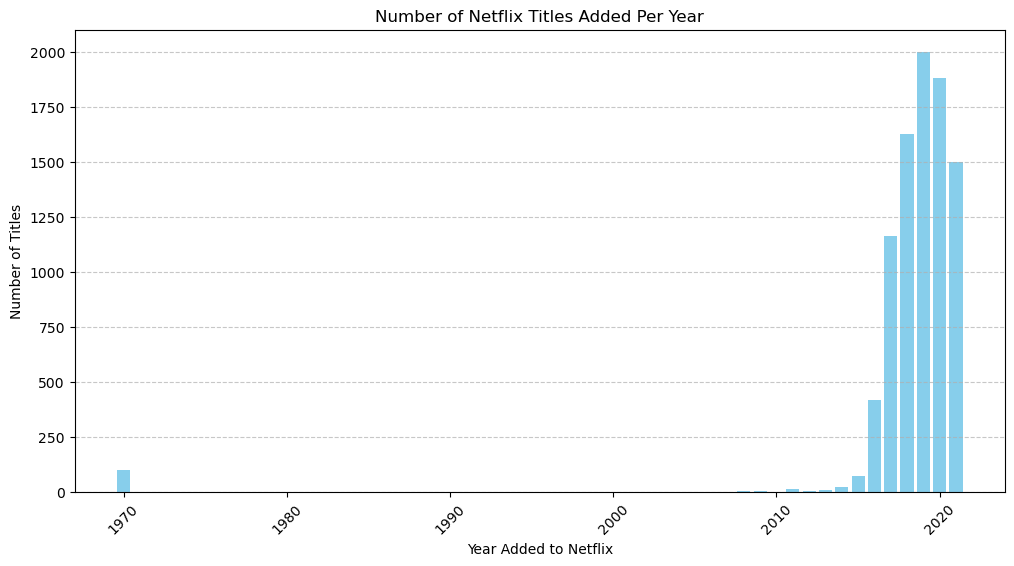

In [36]:
# Count titles added per year
yearly_counts = df['year_added'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')

# Labels
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Titles")
plt.title("Number of Netflix Titles Added Per Year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save the figure
plt.savefig("images/netflix_titles_per_year.png")

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

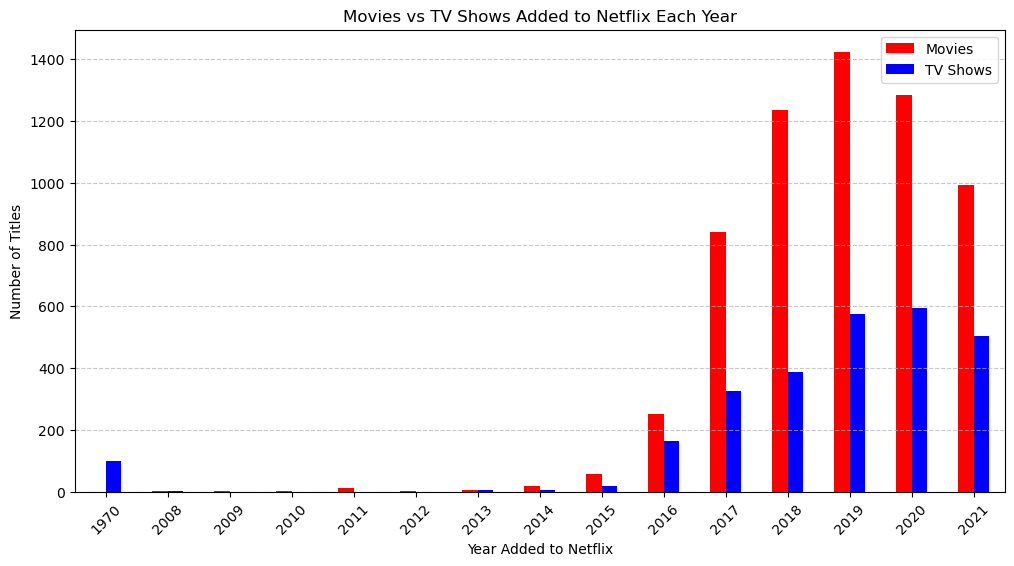

In [38]:
# Group by year and type (Movie/TV Show)
df_type_year = df.groupby(['year_added', 'type']).size().unstack()

# Plot
plt.figure(figsize=(12, 6))
df_type_year.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'blue'])

# Labels
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Titles")
plt.title("Movies vs TV Shows Added to Netflix Each Year")
plt.xticks(rotation=45)
plt.legend(["Movies", "TV Shows"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save the figure
plt.savefig("images/movies_vs_tv_shows.png")

# Show the plot
plt.show()


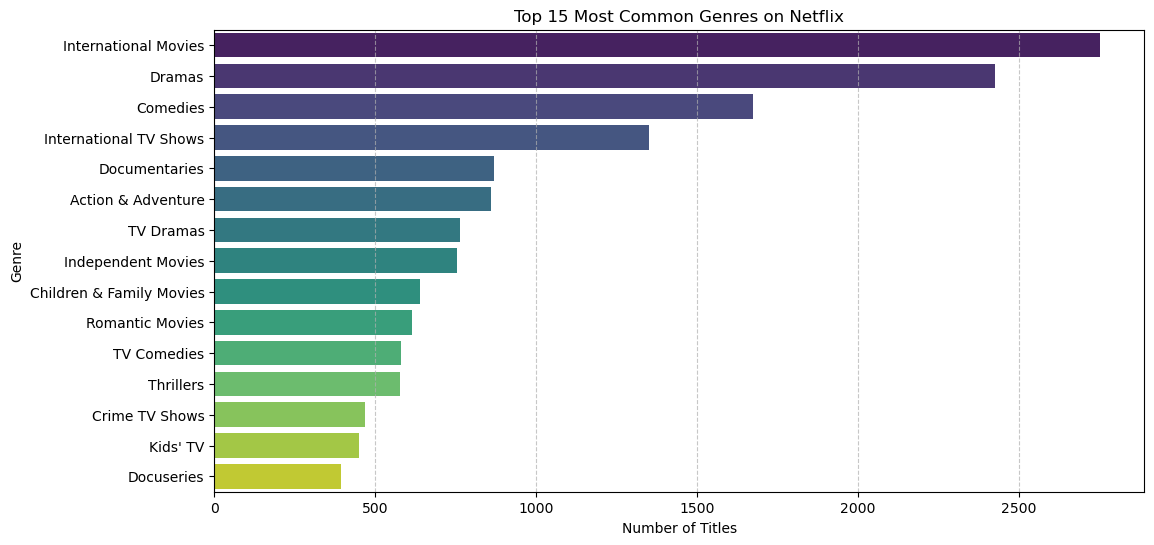

In [40]:
# Split the `listed_in` column and count occurrences
all_genres = df['listed_in'].str.split(', ').explode()

# Count frequency
genre_counts = all_genres.value_counts().head(15)  # Top 15 genres

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")

# Labels
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.title("Top 15 Most Common Genres on Netflix")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Save the figure
plt.savefig("images/most_common_genres.png")

# Show the plot
plt.show()


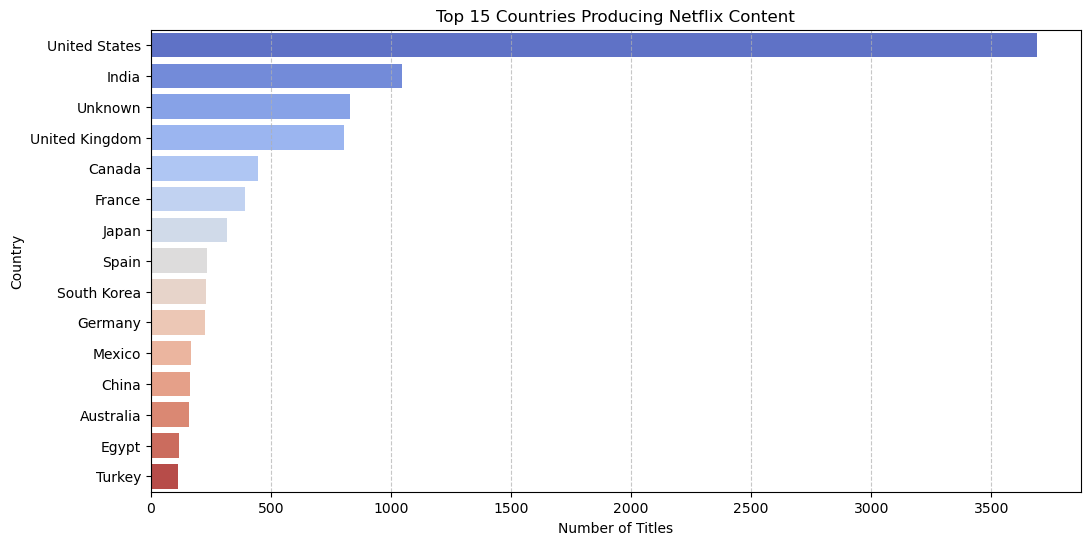

In [42]:
# Split multiple countries into separate rows
df_country = df[['country']].dropna()
df_country['country'] = df_country['country'].str.split(', ')
df_country = df_country.explode('country')

# Count occurrences of each country
country_counts = df_country['country'].value_counts().head(15)  # Top 15 countries

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="coolwarm")

# Labels
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.title("Top 15 Countries Producing Netflix Content")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Save the figure
plt.savefig("images/netflix_countries.png")

# Show the plot
plt.show()


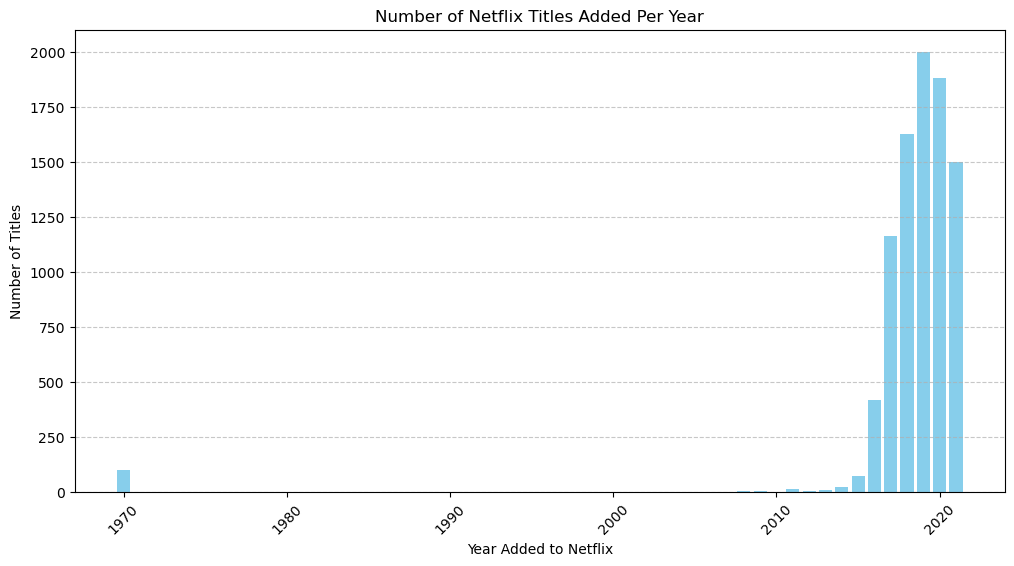

In [46]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(12, 6))

# Generate a bar chart
df_year_counts = df['year_added'].value_counts().sort_index()
plt.bar(df_year_counts.index.astype(int), df_year_counts.values, color='skyblue')

# Labels
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Titles")
plt.title("Number of Netflix Titles Added Per Year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save the figure before displaying it
plt.savefig("images/netflix_titles_per_year.png")  
plt.show()


In [51]:
import os
os.listdir()


['.ipynb_checkpoints',
 'netflix_analysis.ipynb',
 'images',
 'netflix_titles.csv',
 'requirements.txt',
 'netflix_cleaned.csv',
 'README.md']

In [53]:
import os

# Create 'images' folder if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")


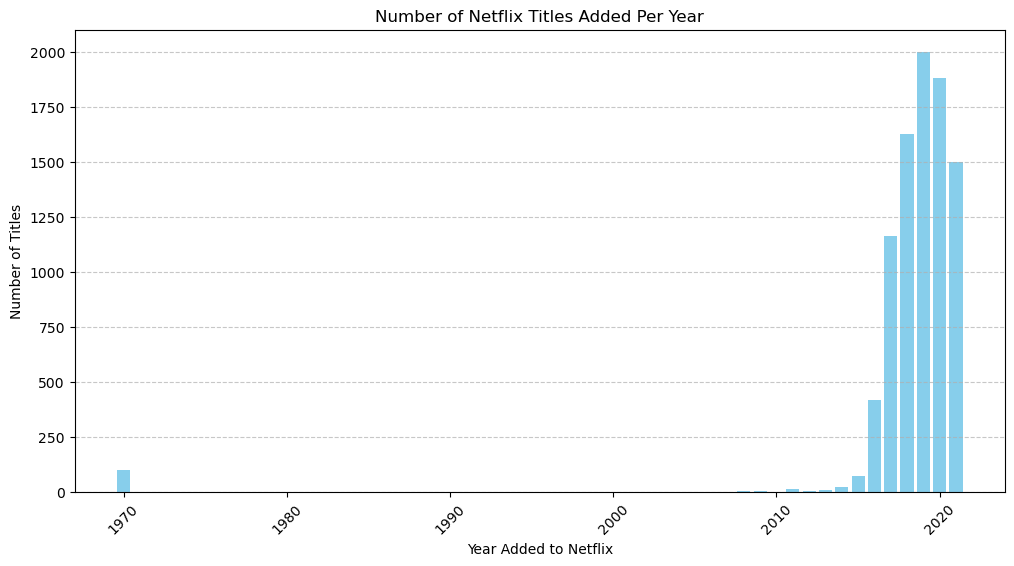

In [55]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(12, 6))

# Generate a bar chart
df_year_counts = df['year_added'].value_counts().sort_index()
plt.bar(df_year_counts.index.astype(int), df_year_counts.values, color='skyblue')

# Labels
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Titles")
plt.title("Number of Netflix Titles Added Per Year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save the figure before displaying it
plt.savefig("images/netflix_titles_per_year.png")  
plt.show()


In [57]:
os.listdir("images")


['netflix_titles_per_year.png',
 'genre_trends.png',
 '.ipynb_checkpoints',
 'netflix_countries.png',
 'movies_vs_tv_shows.png',
 'most_common_genres.png']